<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/tf_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.random.randn(2000,3)
w = [0.3,0.5,0.1]
b = -0.2

noise = np.random.randn(1,2000)*0.1
y = np.matmul(w,x.T) + b + noise

In [4]:
print(y)

[[ 0.26540562 -0.95220147 -0.88350834 ...  0.38039824 -0.78624699
  -0.9807668 ]]


In [6]:
a = np.array([1,2,3])
a.shape

(3,)

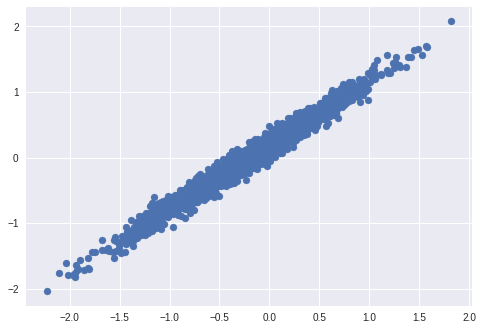

In [9]:
plt.scatter(y.reshape(2000,1),np.matmul(w,x.T))
plt.show()

In [16]:
import tensorflow as tf

ITERATIONS = 10
wb_ = []

g = tf.Graph()

#creating a graph
with g.as_default():
  x_node = tf.placeholder(tf.float32,shape = [None,3])
  y_node = tf.placeholder(tf.float32,shape = None)
  
  with tf.name_scope('inference') as scope:
    w_node = tf.Variable([[0,0,0]], dtype = tf.float32, name = 'weights')
    b_node = tf.Variable(0,dtype = tf.float32,name = 'bias')
    y_pred = tf.matmul(w_node,tf.transpose(x_node)) + b_node
    
  with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(y_node - y_pred))
    
  with tf.name_scope('train') as scope:
    learning_rate = 0.3
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
  #initializing the variables
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    for step in range(ITERATIONS):
      sess.run(train,{x_node : x, y_node: y})
      if(step % 5 == 0):
        print(step,sess.run([w_node,b_node]))
        wb_.append(sess.run([w_node,b_node]))
      
    print(10,sess.run([w_node,b_node]))
      
  
  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
0 [array([[0.18352182, 0.2983305 , 0.06029793]], dtype=float32), -0.122576974]
5 [array([[0.30093318, 0.4986942 , 0.09907946]], dtype=float32), -0.19784766]
10 [array([[0.301987  , 0.50084764, 0.09943762]], dtype=float32), -0.19843915]
